# Implementasi Metrik Evaluasi pada Dataset Real

Dalam notebook ini, kita akan mengimplementasikan berbagai metrik evaluasi pada dataset real. Kita akan menggunakan:
1. Dataset Iris untuk klasifikasi multi-kelas
2. Dataset Boston Housing untuk regresi
3. Dataset Wine untuk clustering

Tujuan pembelajaran:
1. Menerapkan metrik evaluasi pada kasus nyata
2. Memahami interpretasi setiap metrik
3. Membandingkan performa berbagai model
4. Visualisasi hasil evaluasi

Mari kita mulai dengan import library yang diperlukan.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score,
    roc_curve, auc, precision_recall_curve,
    silhouette_score, calinski_harabasz_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans

np.random.seed(42)

# 1. Klasifikasi Multi-kelas dengan Dataset Iris

Dataset Iris adalah dataset klasik untuk klasifikasi multi-kelas. Kita akan:
1. Membandingkan performa beberapa model klasifikasi
2. Mengevaluasi menggunakan berbagai metrik
3. Visualisasi hasil dengan confusion matrix dan ROC curves
4. Menggunakan cross-validation untuk evaluasi yang lebih robust

/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Perbandingan Performa Model:
                     accuracy  macro_precision  macro_recall  macro_f1
Logistic Regression       1.0              1.0           1.0       1.0
SVM                       1.0              1.0           1.0       1.0
Random Forest             1.0              1.0           1.0       1.0


<Figure size 1200x600 with 0 Axes>

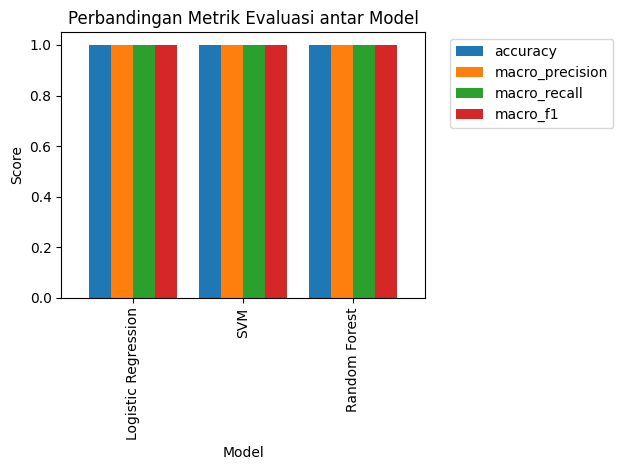

In [72]:
# Load dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model-model
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

# Dictionary untuk menyimpan hasil
results = {}

# Training dan evaluasi setiap model
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Prediksi
    y_pred = model.predict(X_test_scaled)
    
    # Hitung metrik
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'macro_precision': precision_score(y_test, y_pred, average='macro'),
        'macro_recall': recall_score(y_test, y_pred, average='macro'),
        'macro_f1': f1_score(y_test, y_pred, average='macro')
    }

# Tampilkan hasil dalam bentuk DataFrame
results_df = pd.DataFrame(results).T
print("Perbandingan Performa Model:")
print(results_df.round(4))

# Visualisasi perbandingan metrik
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', width=0.8)
plt.title('Perbandingan Metrik Evaluasi antar Model')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analisis Mendalam dengan Confusion Matrix

Mari kita lihat confusion matrix untuk setiap model untuk memahami lebih detail bagaimana model melakukan klasifikasi untuk setiap kelas.

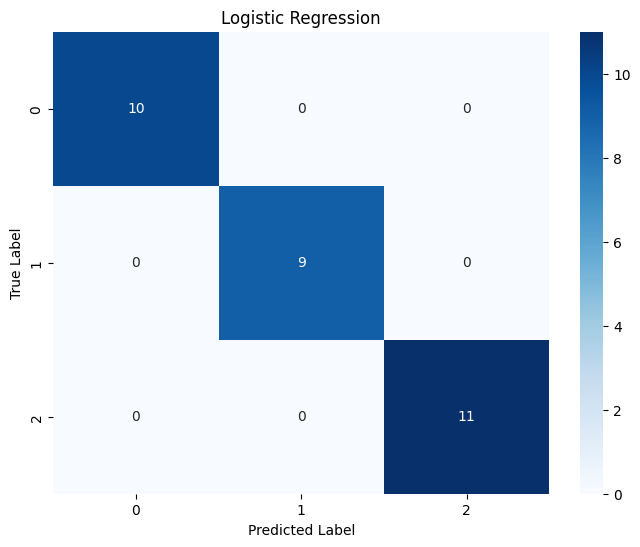


Classification Report untuk Logistic Regression:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



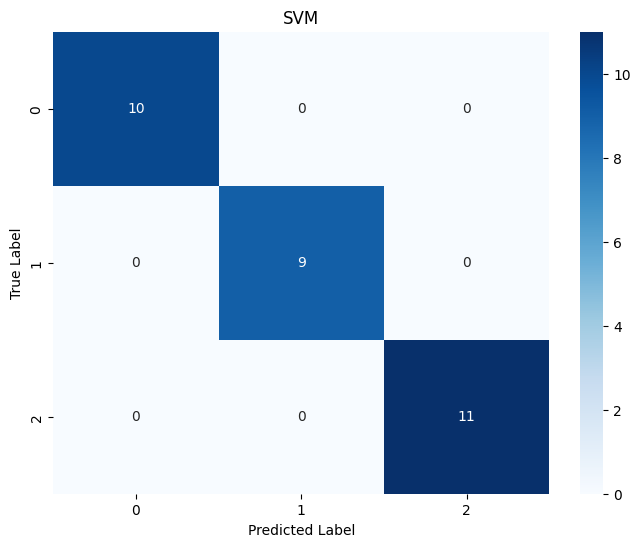


Classification Report untuk SVM:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



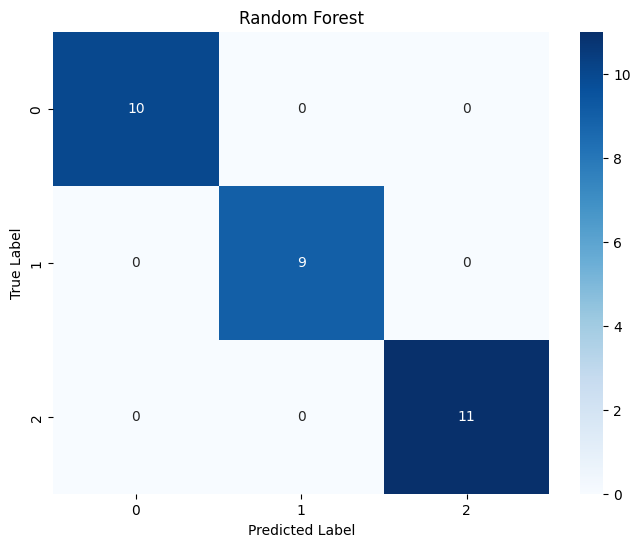


Classification Report untuk Random Forest:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [73]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Print classification report
    print(f"\nClassification Report untuk {title}:")
    print(classification_report(y_true, y_pred, 
                              target_names=iris.target_names))

# Plot confusion matrix untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, y_pred, name)

# Cross-Validation untuk Evaluasi yang Lebih Robust

Karena dataset kita relatif kecil, kita akan menggunakan cross-validation untuk mendapatkan estimasi performa yang lebih reliable.

/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/dihak/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was 

/tmp/ipykernel_48728/4170040333.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=models.keys())


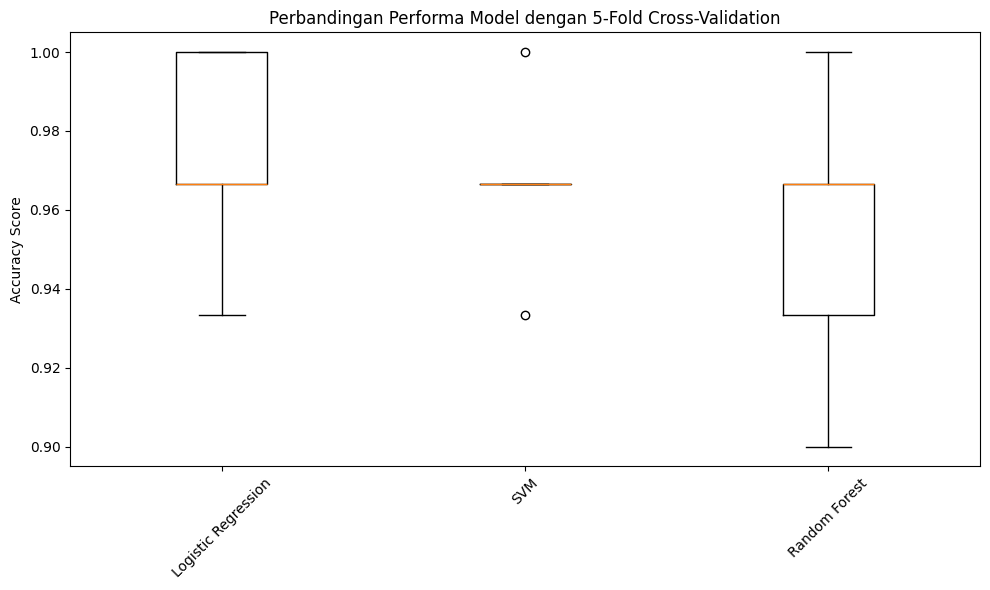


Hasil Cross-Validation:

Logistic Regression:
Mean Accuracy: 0.9733
Standard Deviation: 0.0249

SVM:
Mean Accuracy: 0.9667
Standard Deviation: 0.0211

Random Forest:
Mean Accuracy: 0.9533
Standard Deviation: 0.0340


In [74]:
# Melakukan 5-fold cross-validation untuk setiap model
cv_results = {}

for name, model in models.items():
    # Hitung cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    cv_results[name] = {
        'mean_score': cv_scores.mean(),
        'std_score': cv_scores.std(),
        'scores': cv_scores
    }

# Visualisasi hasil cross-validation
plt.figure(figsize=(10, 6))
scores = [cv_results[name]['scores'] for name in models.keys()]
plt.boxplot(scores, labels=models.keys())
plt.title('Perbandingan Performa Model dengan 5-Fold Cross-Validation')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print hasil detail
print("\nHasil Cross-Validation:")
for name in models:
    print(f"\n{name}:")
    print(f"Mean Accuracy: {cv_results[name]['mean_score']:.4f}")
    print(f"Standard Deviation: {cv_results[name]['std_score']:.4f}")

# 2. Regresi dengan Dataset California Housing

Sekarang kita akan beralih ke masalah regresi menggunakan dataset California Housing. Kita akan:
1. Membandingkan beberapa model regresi
2. Mengevaluasi menggunakan MSE, RMSE, MAE, dan R²
3. Visualisasi prediksi vs nilai aktual
4. Analisis residual

Perbandingan Performa Model Regresi:
                      MSE    RMSE     MAE      R2
Linear Regression  0.5559  0.7456  0.5332  0.5758
Random Forest      0.2552  0.5051  0.3274  0.8053


<Figure size 1200x600 with 0 Axes>

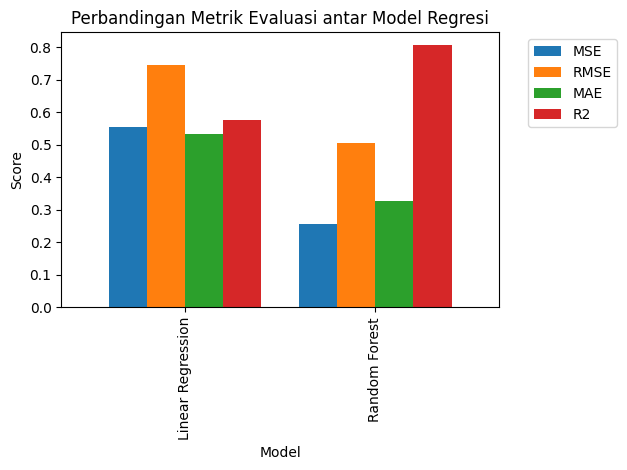

In [75]:
# Load California Housing dataset
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

# Split data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Scaling fitur
scaler_h = StandardScaler()
X_train_h_scaled = scaler_h.fit_transform(X_train_h)
X_test_h_scaled = scaler_h.transform(X_test_h)

# Model regresi
models_reg = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Dictionary untuk menyimpan hasil
results_reg = {}

# Training dan evaluasi setiap model
for name, model in models_reg.items():
    # Train model
    model.fit(X_train_h_scaled, y_train_h)
    
    # Prediksi
    y_pred = model.predict(X_test_h_scaled)
    
    # Hitung metrik
    results_reg[name] = {
        'MSE': mean_squared_error(y_test_h, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test_h, y_pred)),
        'MAE': mean_absolute_error(y_test_h, y_pred),
        'R2': r2_score(y_test_h, y_pred)
    }

# Tampilkan hasil
results_reg_df = pd.DataFrame(results_reg).T
print("Perbandingan Performa Model Regresi:")
print(results_reg_df.round(4))

# Visualisasi perbandingan metrik
plt.figure(figsize=(12, 6))
results_reg_df.plot(kind='bar', width=0.8)
plt.title('Perbandingan Metrik Evaluasi antar Model Regresi')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualisasi Prediksi vs Aktual dan Analisis Residual

Mari kita lihat lebih detail bagaimana model memprediksi nilai dan menganalisis residual (error) dari prediksi.

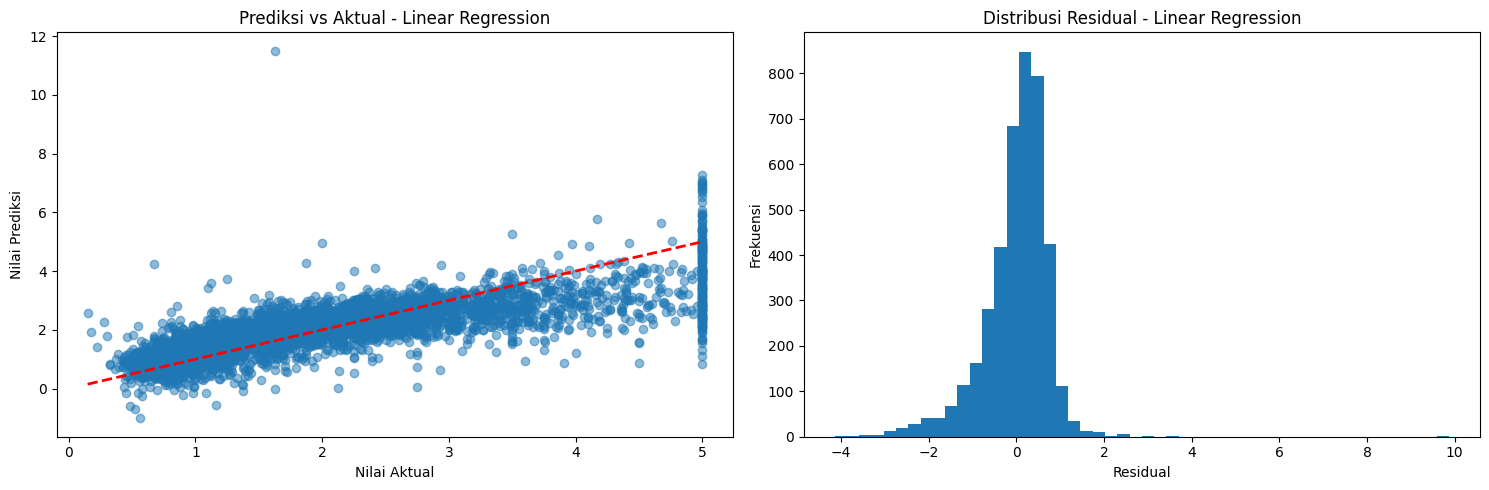


Statistik Residual untuk Linear Regression:
Mean Residual: -0.0035
Std Residual: 0.7456
Min Residual: -4.1484
Max Residual: 9.8753


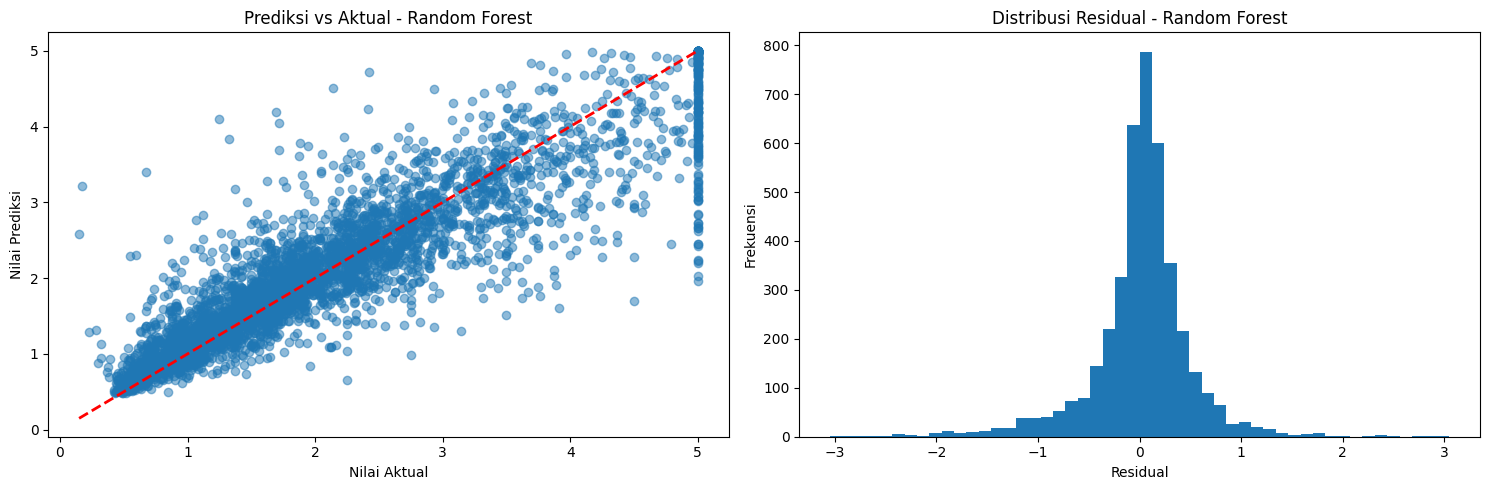


Statistik Residual untuk Random Forest:
Mean Residual: 0.0125
Std Residual: 0.5050
Min Residual: -3.0435
Max Residual: 3.0458


In [76]:
# Fungsi untuk plot prediksi vs aktual dan residual
def plot_regression_analysis(y_true, y_pred, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot prediksi vs aktual
    ax1.scatter(y_true, y_pred, alpha=0.5)
    ax1.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    ax1.set_xlabel('Nilai Aktual')
    ax1.set_ylabel('Nilai Prediksi')
    ax1.set_title(f'Prediksi vs Aktual - {title}')
    
    # Plot residual
    residuals = y_pred - y_true
    ax2.hist(residuals, bins=50)
    ax2.set_xlabel('Residual')
    ax2.set_ylabel('Frekuensi')
    ax2.set_title(f'Distribusi Residual - {title}')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistik residual
    print(f"\nStatistik Residual untuk {title}:")
    print(f"Mean Residual: {residuals.mean():.4f}")
    print(f"Std Residual: {residuals.std():.4f}")
    print(f"Min Residual: {residuals.min():.4f}")
    print(f"Max Residual: {residuals.max():.4f}")

# Analisis untuk setiap model
for name, model in models_reg.items():
    y_pred = model.predict(X_test_h_scaled)
    plot_regression_analysis(y_test_h, y_pred, name)

# 3. Clustering dengan Dataset Wine

Terakhir, kita akan mengevaluasi performa clustering menggunakan dataset Wine. Kita akan:
1. Menerapkan K-Means clustering
2. Evaluasi menggunakan Silhouette Score dan Calinski-Harabasz Index
3. Visualisasi hasil clustering
4. Mencari jumlah cluster optimal

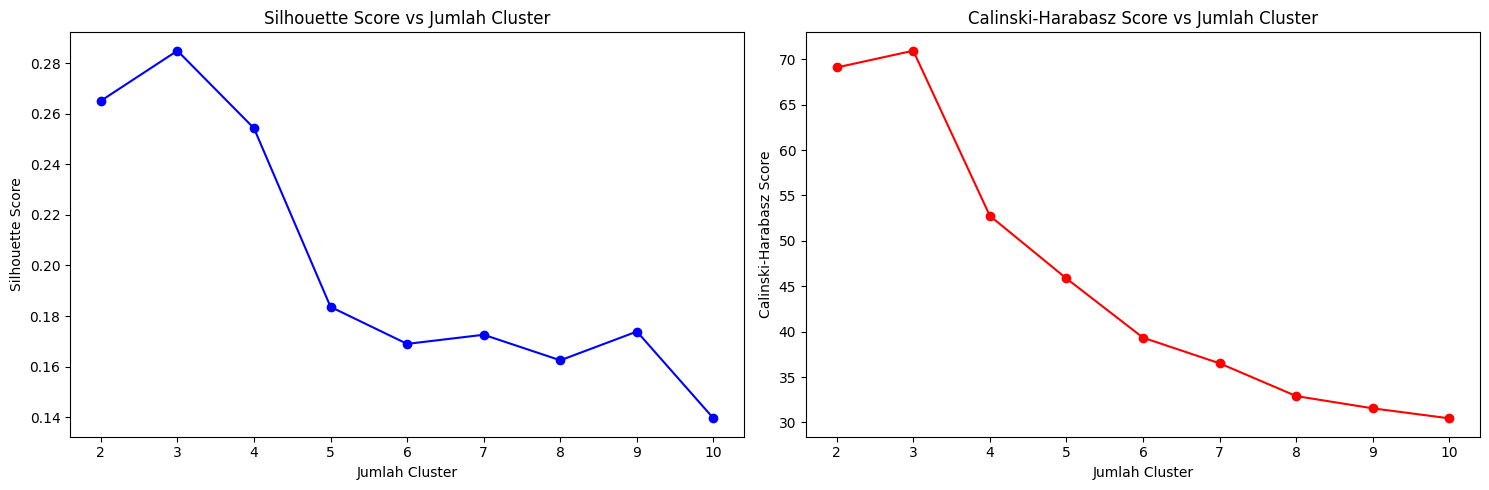


Jumlah Cluster Optimal:
Berdasarkan Silhouette Score: 3
Berdasarkan Calinski-Harabasz Score: 3


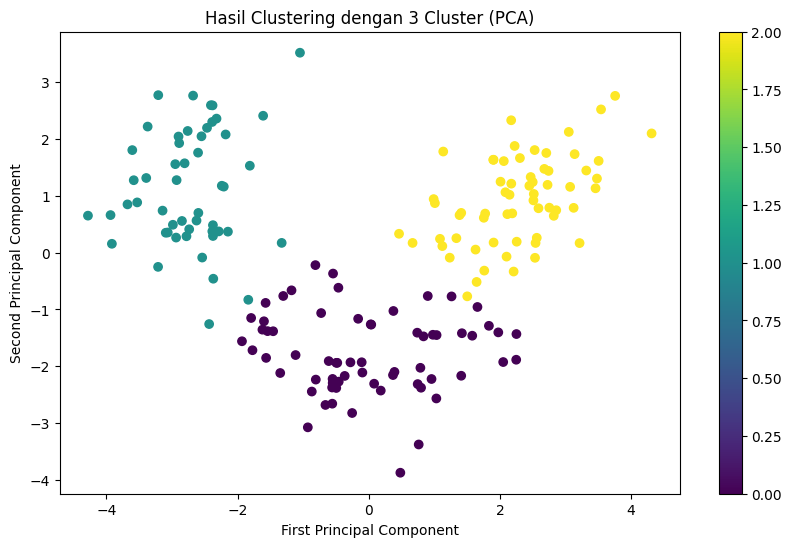

In [77]:
# Load Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Scaling data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

# Mencoba berbagai jumlah cluster
n_clusters_range = range(2, 11)
clustering_scores = {
    'silhouette': [],
    'calinski_harabasz': []
}

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_wine_scaled)
    
    # Hitung scores
    silhouette = silhouette_score(X_wine_scaled, cluster_labels)
    calinski = calinski_harabasz_score(X_wine_scaled, cluster_labels)
    
    clustering_scores['silhouette'].append(silhouette)
    clustering_scores['calinski_harabasz'].append(calinski)

# Visualisasi scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(list(n_clusters_range), clustering_scores['silhouette'], 'bo-')
ax1.set_xlabel('Jumlah Cluster')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Score vs Jumlah Cluster')

ax2.plot(list(n_clusters_range), clustering_scores['calinski_harabasz'], 'ro-')
ax2.set_xlabel('Jumlah Cluster')
ax2.set_ylabel('Calinski-Harabasz Score')
ax2.set_title('Calinski-Harabasz Score vs Jumlah Cluster')

plt.tight_layout()
plt.show()

# Print hasil optimal
optimal_n_silhouette = n_clusters_range[np.argmax(clustering_scores['silhouette'])]
optimal_n_calinski = n_clusters_range[np.argmax(clustering_scores['calinski_harabasz'])]

print("\nJumlah Cluster Optimal:")
print(f"Berdasarkan Silhouette Score: {optimal_n_silhouette}")
print(f"Berdasarkan Calinski-Harabasz Score: {optimal_n_calinski}")

# Implementasi dengan jumlah cluster optimal
optimal_kmeans = KMeans(n_clusters=optimal_n_silhouette, random_state=42)
optimal_labels = optimal_kmeans.fit_predict(X_wine_scaled)

# Visualisasi hasil clustering (menggunakan PCA untuk visualisasi 2D)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_wine_pca = pca.fit_transform(X_wine_scaled)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], 
                     c=optimal_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title(f'Hasil Clustering dengan {optimal_n_silhouette} Cluster (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Kesimpulan dan Best Practices

Dari implementasi di atas, kita dapat menyimpulkan beberapa best practices dalam evaluasi model:

1. **Klasifikasi**
   - Gunakan multiple metrics (accuracy, precision, recall, F1-score)
   - Confusion matrix sangat membantu untuk analisis detail
   - Cross-validation penting untuk evaluasi yang robust
   - Perhatikan kasus imbalanced class

2. **Regresi**
   - MSE/RMSE bagus untuk penalti error besar
   - MAE lebih robust terhadap outliers
   - R² membantu memahami proporsi variance yang dijelaskan
   - Analisis residual penting untuk memahami distribusi error

3. **Clustering**
   - Gunakan multiple metrics (Silhouette, Calinski-Harabasz)
   - Visualisasi membantu memahami struktur cluster
   - Coba berbagai jumlah cluster untuk mencari optimal
   - Validasi hasil dengan domain knowledge

**Tips Tambahan:**
1. Selalu gunakan data test yang terpisah
2. Lakukan preprocessing yang sesuai (scaling, encoding)
3. Pertimbangkan konteks bisnis dalam pemilihan metrik
4. Visualisasikan hasil untuk pemahaman lebih baik
5. Gunakan cross-validation untuk dataset kecil

# Latihan Praktis: Implementasi Metrik Evaluasi

Mari kita latih pemahaman kita tentang metrik evaluasi dengan beberapa latihan praktis.

## Latihan 1: Evaluasi Model Klasifikasi
Dalam latihan ini, kita akan:
1. Membuat dataset klasifikasi yang tidak seimbang (imbalanced)
2. Mengevaluasi model dengan berbagai metrik
3. Mengimplementasikan teknik untuk menangani ketidakseimbangan kelas

## Latihan 2: Analisis Regresi
Kita akan menganalisis performa model regresi dengan:
1. Membandingkan berbagai metrik evaluasi
2. Menganalisis residual
3. Menangani outliers

## Latihan 3: Optimasi Clustering
Kita akan mengoptimalkan model clustering dengan:
1. Mencari jumlah cluster optimal
2. Membandingkan berbagai metrik evaluasi
3. Visualisasi hasil

Mari kita mulai dengan Latihan 1!

# Latihan 1: Evaluasi Model Klasifikasi

## Tugas:
1. Buat dataset klasifikasi dengan rasio kelas 1:9 (sangat tidak seimbang)
2. Evaluasi model menggunakan:
   - Accuracy
   - Precision
   - Recall
   - F1-score
3. Implementasikan salah satu teknik untuk menangani ketidakseimbangan:
   - Class weights
   - SMOTE
   - Random oversampling
4. Bandingkan hasil sebelum dan sesudah penanganan

## Template Code:
Gunakan template berikut dan lengkapi bagian yang kosong.

In [ ]:
# Template untuk Latihan 1
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# 1. Buat dataset tidak seimbang
X_imb, y_imb = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% kelas 0, 10% kelas 1
    random_state=42
)

# 2. Split data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42
)

# 3. Model dasar (tanpa penanganan ketidakseimbangan)
print("Model Dasar (Tanpa Penanganan):")
print("-" * 30)

# TODO: Implementasikan model dasar
# clf_base = ...
# clf_base.fit(...)
# y_pred_base = ...

# TODO: Evaluasi model dasar
# print(classification_report(...))

# 4. Model dengan class weights
print("\nModel dengan Class Weights:")
print("-" * 30)

# TODO: Implementasikan model dengan class weights
# clf_weighted = ...
# clf_weighted.fit(...)
# y_pred_weighted = ...

# TODO: Evaluasi model dengan weights
# print(classification_report(...))

# 5. Model dengan SMOTE
print("\nModel dengan SMOTE:")
print("-" * 30)

# TODO: Implementasikan SMOTE
# smote = ...
# X_train_smote, y_train_smote = ...

# TODO: Train dan evaluasi model dengan SMOTE
# clf_smote = ...
# clf_smote.fit(...)
# y_pred_smote = ...

# TODO: Evaluasi model dengan SMOTE
# print(classification_report(...))

Model Dasar (Tanpa Penanganan):
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       180
           1       0.46      0.30      0.36        20

    accuracy                           0.90       200
   macro avg       0.69      0.63      0.65       200
weighted avg       0.88      0.90      0.88       200


Model dengan Class Weights:
------------------------------
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       180
           1       0.41      0.75      0.53        20

    accuracy                           0.86       200
   macro avg       0.69      0.81      0.72       200
weighted avg       0.91      0.86      0.88       200



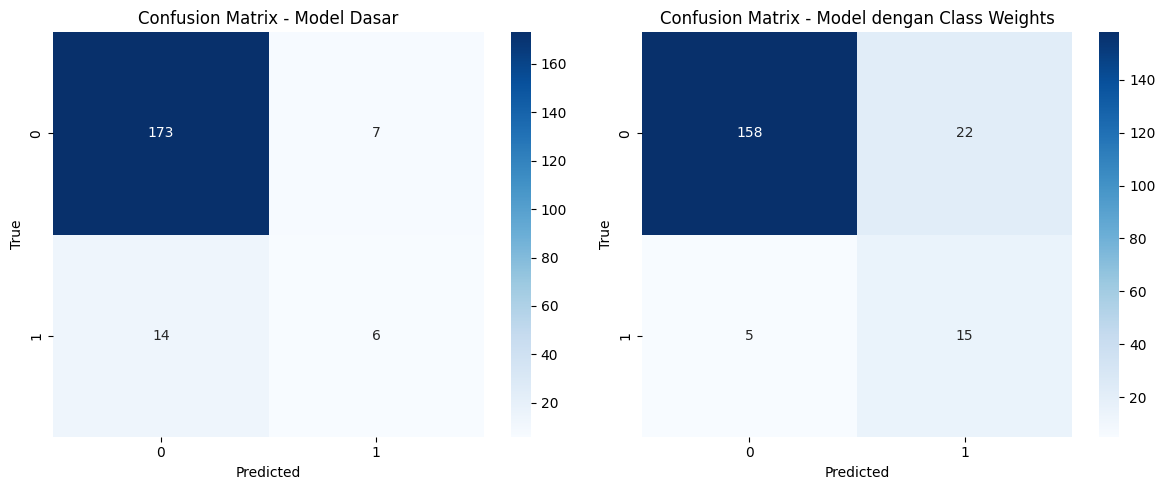

In [79]:
# Latihan 1: Implementasi untuk dataset tidak seimbang
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# 1. Buat dataset tidak seimbang
X_imb, y_imb = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% kelas 0, 10% kelas 1
    random_state=42
)

# 2. Split data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42
)

# 3. Model dasar (tanpa penanganan ketidakseimbangan)
print("Model Dasar (Tanpa Penanganan):")
print("-" * 30)

clf_base = LogisticRegression(random_state=42)
clf_base.fit(X_train_imb, y_train_imb)
y_pred_base = clf_base.predict(X_test_imb)

print(classification_report(y_test_imb, y_pred_base))

# 4. Model dengan class weights
print("\nModel dengan Class Weights:")
print("-" * 30)

# Hitung class weights
n_samples = len(y_train_imb)
n_classes = len(np.unique(y_train_imb))
class_weights = dict(zip(
    np.unique(y_train_imb),
    n_samples / (n_classes * np.bincount(y_train_imb))
))

clf_weighted = LogisticRegression(class_weight=class_weights, random_state=42)
clf_weighted.fit(X_train_imb, y_train_imb)
y_pred_weighted = clf_weighted.predict(X_test_imb)

print(classification_report(y_test_imb, y_pred_weighted))

# Visualisasi perbandingan
def plot_confusion_matrices(y_true, y_pred1, y_pred2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    cm1 = confusion_matrix(y_true, y_pred1)
    cm2 = confusion_matrix(y_true, y_pred2)
    
    sns.heatmap(cm1, annot=True, fmt='d', ax=ax1, cmap='Blues')
    ax1.set_title(title1)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('True')
    
    sns.heatmap(cm2, annot=True, fmt='d', ax=ax2, cmap='Blues')
    ax2.set_title(title2)
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('True')
    
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(
    y_test_imb, 
    y_pred_base, 
    y_pred_weighted,
    'Confusion Matrix - Model Dasar',
    'Confusion Matrix - Model dengan Class Weights'
)

# Latihan 2: Analisis Regresi

## Tugas:
1. Buat dataset regresi dengan outliers
2. Evaluasi model menggunakan berbagai metrik
3. Implementasikan teknik untuk menangani outliers
4. Analisis dan visualisasi residual

## Petunjuk:
1. Gunakan `make_regression` dengan noise
2. Tambahkan outliers secara manual
3. Bandingkan MAE dan MSE
4. Visualisasikan distribusi residual


Model Dasar (Dengan Outliers)
-----------------------------
MSE: 323.00
RMSE: 17.97
MAE: 10.38
R²: 0.96


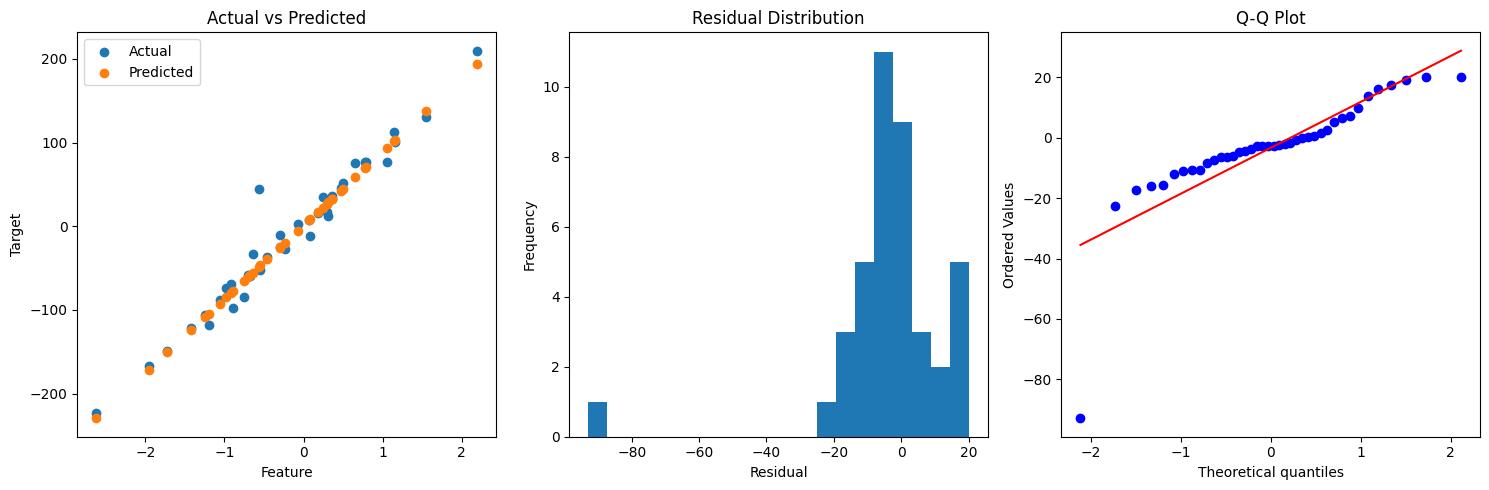


Model Tanpa Outliers
--------------------
MSE: 318.27
RMSE: 17.84
MAE: 10.03
R²: 0.96


In [80]:
# Latihan 2: Implementasi
from sklearn.datasets import make_regression

# 1. Buat dataset dengan outliers
X_reg, y_reg = make_regression(
    n_samples=200,
    n_features=1,
    noise=10,
    random_state=42
)

# Tambah outliers
outlier_indices = np.random.choice(len(y_reg), 10, replace=False)
y_reg[outlier_indices] += np.random.normal(0, 100, 10)

# 2. Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# 3. Train model dan evaluasi
def evaluate_regression(X_train, X_test, y_train, y_test, title):
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Hitung metrik
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{title}")
    print("-" * len(title))
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.2f}")
    
    return y_pred

# Evaluasi model dasar
y_pred_reg = evaluate_regression(
    X_train_reg, X_test_reg, 
    y_train_reg, y_test_reg,
    "Model Dasar (Dengan Outliers)"
)

# 4. Visualisasi
plt.figure(figsize=(15, 5))

# Plot data dan prediksi
plt.subplot(131)
plt.scatter(X_test_reg, y_test_reg, label='Actual')
plt.scatter(X_test_reg, y_pred_reg, label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()

# Plot residual
residuals = y_pred_reg - y_test_reg
plt.subplot(132)
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

# Q-Q plot
from scipy import stats
plt.subplot(133)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 5. Implementasi dengan robust regression (menghilangkan outliers)
def remove_outliers(X, y, threshold=2):
    z_scores = np.abs(stats.zscore(y))
    mask = z_scores < threshold
    return X[mask], y[mask]

# Remove outliers dari data training
X_train_clean, y_train_clean = remove_outliers(X_train_reg, y_train_reg)

# Evaluasi model tanpa outliers
y_pred_clean = evaluate_regression(
    X_train_clean, X_test_reg,
    y_train_clean, y_test_reg,
    "Model Tanpa Outliers"
)

# Latihan 3: Optimasi Clustering

## Tugas:
1. Buat dataset dengan cluster yang jelas
2. Implementasikan K-means dengan berbagai jumlah cluster
3. Evaluasi menggunakan berbagai metrik
4. Visualisasi hasil clustering

## Petunjuk:
1. Gunakan `make_blobs` untuk membuat dataset
2. Implementasikan elbow method
3. Bandingkan hasil dengan ground truth
4. Visualisasikan hasil dengan PCA

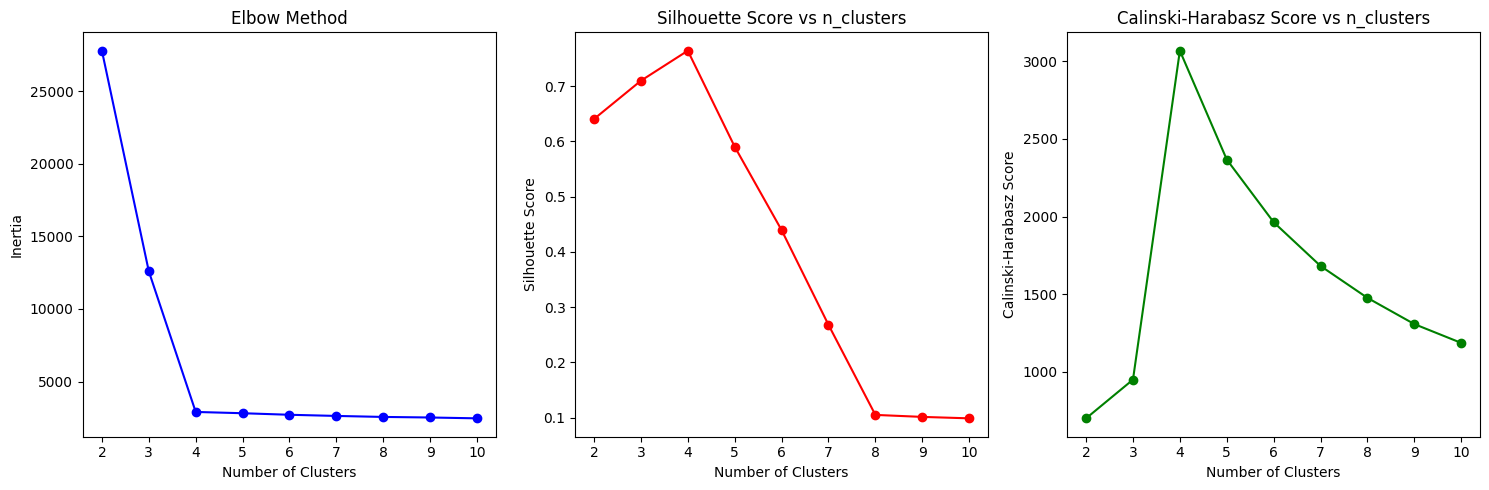

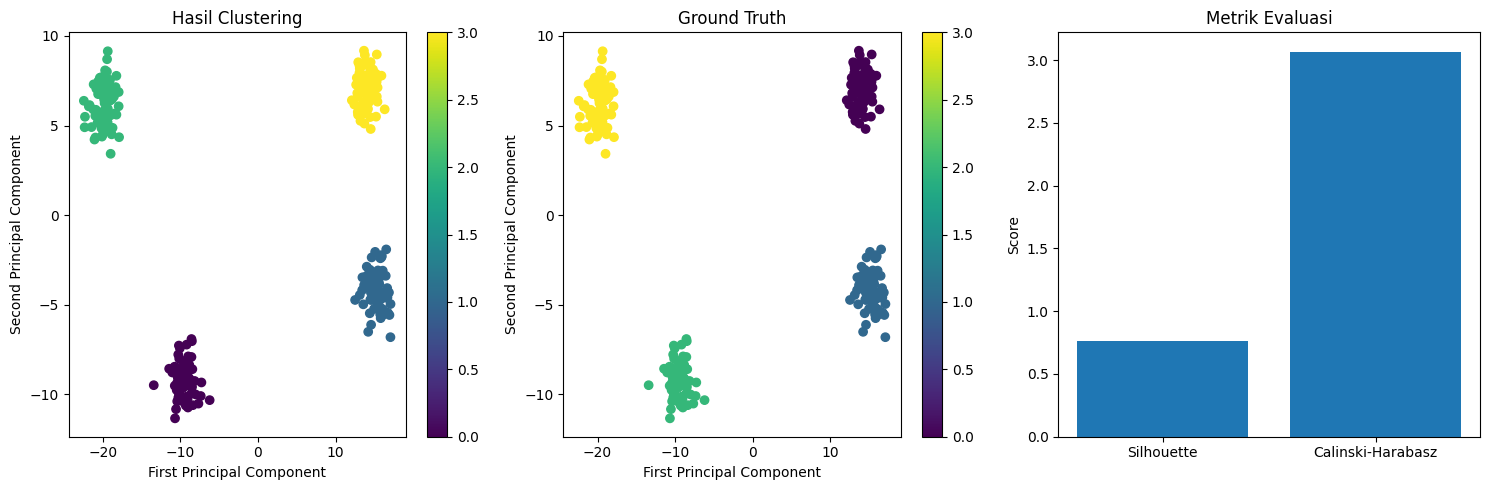


Hasil Evaluasi Clustering:
-------------------------
Silhouette Score: 0.7640
Calinski-Harabasz Score: 3068.1704
Inertia: 2903.4415


In [81]:
# Latihan 3: Implementasi
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# 1. Buat dataset
X_cluster, y_cluster_true = make_blobs(
    n_samples=300,
    n_features=10,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# 2. Implementasi elbow method
inertias = []
silhouette_scores = []
calinski_scores = []
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_cluster)
    
    # Get cluster assignments
    labels = kmeans.labels_
    
    # Calculate metrics
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, labels))
    calinski_scores.append(calinski_harabasz_score(X_cluster, labels))

# 3. Visualisasi metrik
plt.figure(figsize=(15, 5))

# Elbow curve
plt.subplot(131)
plt.plot(n_clusters_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Silhouette score
plt.subplot(132)
plt.plot(n_clusters_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs n_clusters')

# Calinski-Harabasz score
plt.subplot(133)
plt.plot(n_clusters_range, calinski_scores, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs n_clusters')

plt.tight_layout()
plt.show()

# 4. Implementasi dengan jumlah cluster optimal
optimal_n_clusters = 4  # Dari analisis di atas
optimal_kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = optimal_kmeans.fit_predict(X_cluster)

# 5. Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(15, 5))

# Plot hasil clustering
plt.subplot(131)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=cluster_labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Hasil Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot ground truth
plt.subplot(132)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=y_cluster_true, cmap='viridis')
plt.colorbar(scatter)
plt.title('Ground Truth')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot perbandingan metrik
plt.subplot(133)
metrics = {
    'Silhouette': silhouette_score(X_cluster, cluster_labels),
    'Calinski-Harabasz': calinski_harabasz_score(X_cluster, cluster_labels) / 1000  # Scaling for visualization
}
plt.bar(metrics.keys(), metrics.values())
plt.title('Metrik Evaluasi')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Print hasil evaluasi
print("\nHasil Evaluasi Clustering:")
print("-" * 25)
print(f"Silhouette Score: {metrics['Silhouette']:.4f}")
print(f"Calinski-Harabasz Score: {metrics['Calinski-Harabasz']*1000:.4f}")
print(f"Inertia: {optimal_kmeans.inertia_:.4f}")

# Tugas Praktik

Sekarang giliran Anda untuk mencoba! Berikut beberapa tugas yang bisa dikerjakan:

## 1. Klasifikasi
- Coba implementasikan teknik SMOTE untuk menangani ketidakseimbangan kelas
- Bandingkan performa dengan dan tanpa SMOTE
- Visualisasikan distribusi kelas sebelum dan sesudah SMOTE

## 2. Regresi
- Implementasikan teknik robust regression (misalnya Huber Regressor)
- Bandingkan performa dengan Linear Regression biasa
- Tambahkan visualisasi residual yang lebih detail

## 3. Clustering
- Coba implementasikan metode clustering lain (DBSCAN, Hierarchical Clustering)
- Bandingkan hasil dengan K-Means
- Visualisasikan dendogram untuk hierarchical clustering

## Tips
1. Gunakan dataset yang berbeda (misalnya dari scikit-learn atau Kaggle)
2. Eksperimen dengan parameter berbeda
3. Tambahkan visualisasi yang informatif
4. Dokumentasikan hasil dan kesimpulan

## Metrik yang Bisa Ditambahkan
1. Klasifikasi:
   - ROC Curve dan AUC
   - Precision-Recall Curve
   - Cohen's Kappa

2. Regresi:
   - Explained Variance Score
   - Max Error
   - Median Absolute Error

3. Clustering:
   - Davies-Bouldin Index
   - Adjusted Rand Index (jika ada ground truth)
   - Adjusted Mutual Information Score